In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("E:\\machine_learning\\learningDL\\customerChurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop("customerID",inplace=True,axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(df.shape)
df=df[df["TotalCharges"]!=" "]
print(df.shape)

(7043, 20)
(7032, 20)


In [5]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<AxesSubplot:title={'center':'customer tenure vs churn prediction'}, xlabel='tenure', ylabel='Count'>

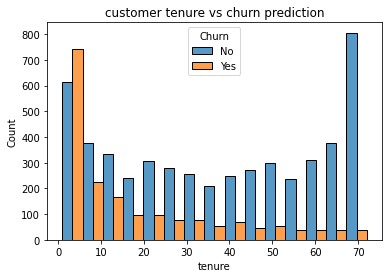

In [6]:
#checking relation between tenure and churn
plt.title("customer tenure vs churn prediction")
sns.histplot(data=df,x="tenure",hue="Churn",multiple="dodge")

<AxesSubplot:title={'center':'customer tenure vs churn prediction'}, xlabel='MonthlyCharges', ylabel='Count'>

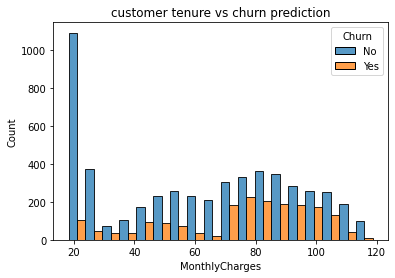

In [7]:
#checking relation between tenure and churn
plt.title("customer tenure vs churn prediction")
sns.histplot(data=df,x="MonthlyCharges",hue="Churn",multiple="dodge")

In [8]:
for i in df.columns:
    print(df[i].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


In [9]:
df.replace("No internet service","No",inplace=True)
df.replace("No phone service","No",inplace=True)
df[df["OnlineSecurity"]=='No internet service']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [10]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [11]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [12]:
df1 = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [13]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [14]:
X = df1.drop("Churn",axis=1)
y = df1["Churn"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [15]:
X_train.shape

(5625, 26)

In [16]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 6s 7ms/step - loss: 0.5792 - accuracy: 0.7056
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4466 - accuracy: 0.7846
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4220 - accuracy: 0.8004
Epoch 4/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4091 - accuracy: 0.8054
Epoch 5/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4121 - accuracy: 0.8085
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4167 - accuracy: 0.8041
Epoch 7/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4112 - accuracy: 0.8068
Epoch 8/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4059 - accuracy: 0.8103
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3964 - accuracy: 0.8139
Epoch 10/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4046 - accura

In [17]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.7811


[0.45271700620651245, 0.7810945510864258]

In [18]:
yp=model.predict(X_test)

In [19]:
yp = yp.reshape(-1)
yp

array([0.20381247, 0.38334155, 0.02517631, ..., 0.7518504 , 0.682598  ,
       0.5909445 ], dtype=float32)

array([0., 0., 0., ..., 1., 1., 0.], dtype=float32)

In [20]:
from sklearn.metrics import confusion_matrix,classification_report

confusion_matrix(yp.round(),y_test)


array([[879, 188],
       [120, 220]], dtype=int64)

In [21]:
print(classification_report(yp.round(),y_test))

              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85      1067
         1.0       0.54      0.65      0.59       340

    accuracy                           0.78      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.80      0.78      0.79      1407



True

In [62]:
X_class_0 = df1[df1["Churn"]==0]
X_class_1 = df1[df1["Churn"]==1]
X_class_0_count, X_class_1_count = df1["Churn"].value_counts()

In [35]:
X_class_0 = X_class_0.sample(n=X_class_1_count,random_state=1)
print(X_class_0.shape)

(1869, 27)


In [38]:
df2 = pd.concat([X_class_0,X_class_1],axis=0)
df2.head()
print(df2.shape)

(3738, 27)


In [40]:
X_sample = df2.drop("Churn",axis=1)
Y_sample = df2["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X_sample, Y_sample, test_size=0.33, random_state=42,stratify=Y_sample)

In [42]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
79/79 [==============================] - 1s 10ms/step - loss: 0.4778 - accuracy: 0.7696
Epoch 2/100
79/79 [==============================] - 1s 7ms/step - loss: 0.4653 - accuracy: 0.7696
Epoch 3/100
79/79 [==============================] - 1s 6ms/step - loss: 0.4628 - accuracy: 0.7772
Epoch 4/100
79/79 [==============================] - 1s 7ms/step - loss: 0.4610 - accuracy: 0.7804
Epoch 5/100
79/79 [==============================] - 0s 6ms/step - loss: 0.4593 - accuracy: 0.7823
Epoch 6/100
79/79 [==============================] - 0s 6ms/step - loss: 0.4587 - accuracy: 0.7823
Epoch 7/100
79/79 [==============================] - 0s 5ms/step - loss: 0.4576 - accuracy: 0.7827
Epoch 8/100
79/79 [==============================] - 0s 5ms/step - loss: 0.4560 - accuracy: 0.7835
Epoch 9/100
79/79 [==============================] - 0s 5ms/step - loss: 0.4554 - accuracy: 0.7827
Epoch 10/100
79/79 [==============================] - 0s 5ms/step - loss: 0.4543 - accuracy: 0.7823
Epoch 11

In [43]:
model.evaluate(X_test,y_test)

39/39 [==============================] - 0s 4ms/step - loss: 0.4792 - accuracy: 0.7731


[0.4792119264602661, 0.7730956077575684]

In [47]:
yp = model.predict(X_test)
yp = yp.reshape(-1)

In [48]:
print(classification_report(yp.round(),y_test))

              precision    recall  f1-score   support

         0.0       0.78      0.77      0.78       629
         1.0       0.76      0.78      0.77       605

    accuracy                           0.77      1234
   macro avg       0.77      0.77      0.77      1234
weighted avg       0.77      0.77      0.77      1234



In [67]:
# using oversampling
X_class_1 = X_class_1.sample(X_class_0_count,replace=True)
print(X_class_1.shape)
print(X_class_0.shape)
df2 = pd.concat([X_class_0,X_class_1],axis=0)

(5163, 27)
(5163, 27)


In [59]:
X_class_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5380,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,1,0,Month-to-month,1,Electronic check,80.25,144.55,1
1198,1,0,0,0,42,1,0,No,0,0,0,0,0,0,Two year,1,Bank transfer (automatic),20.75,844.45,0
7012,1,0,1,0,62,1,1,DSL,1,1,0,1,1,1,Two year,1,Electronic check,84.95,5150.55,0
3306,1,0,1,1,3,1,0,Fiber optic,0,1,0,1,0,0,Month-to-month,1,Electronic check,80.00,241.30,0
2993,0,0,1,1,1,1,0,No,0,0,0,0,0,0,One year,0,Mailed check,20.40,20.40,0


In [68]:
X_sample = df2.drop("Churn",axis=1)
Y_sample = df2["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X_sample, Y_sample, test_size=0.33, random_state=42,stratify=Y_sample)



In [69]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
217/217 [==============================] - 1s 6ms/step - loss: 0.4413 - accuracy: 0.7885
Epoch 2/100
217/217 [==============================] - 1s 7ms/step - loss: 0.4366 - accuracy: 0.7898
Epoch 3/100
217/217 [==============================] - 1s 6ms/step - loss: 0.4338 - accuracy: 0.7918
Epoch 4/100
217/217 [==============================] - 1s 6ms/step - loss: 0.4319 - accuracy: 0.7929
Epoch 5/100
217/217 [==============================] - 1s 5ms/step - loss: 0.4305 - accuracy: 0.7963
Epoch 6/100
217/217 [==============================] - 1s 5ms/step - loss: 0.4285 - accuracy: 0.7960
Epoch 7/100
217/217 [==============================] - 1s 5ms/step - loss: 0.4281 - accuracy: 0.7931
Epoch 8/100
217/217 [==============================] - 1s 5ms/step - loss: 0.4272 - accuracy: 0.7989
Epoch 9/100
217/217 [==============================] - 1s 5ms/step - loss: 0.4257 - accuracy: 0.7976
Epoch 10/100
217/217 [==============================] - 1s 5ms/step - loss: 0.4246 - accura

In [70]:
yp = model.predict(X_test)
yp = yp.reshape(-1)
print(classification_report(yp.round(),y_test))

              precision    recall  f1-score   support

         0.0       0.73      0.81      0.77      1520
         1.0       0.83      0.75      0.79      1888

    accuracy                           0.78      3408
   macro avg       0.78      0.78      0.78      3408
weighted avg       0.79      0.78      0.78      3408



In [73]:
X = df1.drop("Churn",axis=1)
y = df1["Churn"]

In [74]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [76]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority")
X_sm , y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [77]:
X_train, X_test, y_train, y_test = train_test_split( X_sm, y_sm, test_size=0.33, random_state=42)

In [78]:
model.fit(X_train,y_train,epochs=100,use_multiprocessing=True)

Epoch 1/100
217/217 [==============================] - 1s 3ms/step - loss: 0.4305 - accuracy: 0.7988
Epoch 2/100
217/217 [==============================] - 1s 4ms/step - loss: 0.4219 - accuracy: 0.8054
Epoch 3/100
217/217 [==============================] - 1s 3ms/step - loss: 0.4189 - accuracy: 0.8041
Epoch 4/100
217/217 [==============================] - 1s 3ms/step - loss: 0.4157 - accuracy: 0.8069
Epoch 5/100
217/217 [==============================] - 1s 3ms/step - loss: 0.4142 - accuracy: 0.8093
Epoch 6/100
217/217 [==============================] - 1s 4ms/step - loss: 0.4115 - accuracy: 0.8089
Epoch 7/100
217/217 [==============================] - 1s 3ms/step - loss: 0.4102 - accuracy: 0.8093
Epoch 8/100
217/217 [==============================] - 1s 3ms/step - loss: 0.4083 - accuracy: 0.8101
Epoch 9/100
217/217 [==============================] - 1s 3ms/step - loss: 0.4084 - accuracy: 0.8121
Epoch 10/100
217/217 [==============================] - 1s 3ms/step - loss: 0.4054 - accura

In [79]:
model.evaluate(X_test,y_test);

107/107 [==============================] - 0s 3ms/step - loss: 0.4313 - accuracy: 0.8066


In [82]:
yp = model.predict(X_test).reshape(-1)
print(classification_report(yp.round(),y_test))

              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80      1576
         1.0       0.85      0.78      0.81      1832

    accuracy                           0.81      3408
   macro avg       0.81      0.81      0.81      3408
weighted avg       0.81      0.81      0.81      3408



In [83]:
#using emsamble undersampling
#not implemented here but the concept is quite easy... 
#focal loss is also an option
X = df1.drop("Churn",axis="columns")
y= df1["Churn"]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [94]:
df3 = X_train.copy()
df3["Churn"] = y_train

In [95]:
df3_class0 = df3[df3["Churn"]==0]
df3_class1 = df3[df3["Churn"]==1]

In [96]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [98]:
df3_class0[:1495].shape

(1495, 27)